# MIE424 - Practical
#### 18/01/2022
#### Week 1
#### Presented by Jamal Chu and Jake Mosseri

In this lab, we will be using the popular machine learning library [scikit-learn](https://scikit-learn.org/stable/) in tandem with a popular scientific computing library in Python, [NumPy](https://www.numpy.org/), to investigate basic machine learning principles and models. The topics that will be covered in this lab include:
* Introduction to scikit-learn and NumPy
* Exploratory data analysis (EDA)
* Nearest neighbors classification algorithm
* Nested cross-validation

##### Jupyter Notebooks
This lab will be using [Jupyter Notebooks](https://jupyter.org/) as a Python development environment. Hopefully you're somewhat familiar with them. Write your code in *cells* (this is a cell!) and execute your code by pressing the *play* button (up top) or by entering *ctrl+enter*. To format a cell for text, you can select "Markdown" from the dropdown - the default formatting is "Code", which will usually be what you want.

#### Getting started
Let's get started. First, we're going to test that we're able to import the required libraries.  
**>> Run the code in the next cell** to import scikit-learn and NumPy.

In [2]:
import numpy as np
import sklearn 

### NumPy Basics

Great. Let's move on to our next topic: getting a handle on NumPy basics. You can think of NumPy as sort of like a MATLAB for Python (if that helps). The main object is multidimensional arrays, and these come in particularly handy when working with data and machine learning algorithms.

Let's create a 2x4 array containing the numbers 1 through 8 and conduct some basic operations on it.  
**>> Run the code in the next cell to create and print the array.***

In [3]:
array = np.arange(8).reshape(2,4)
array

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

We can access the shape, number of dimensions, data type, and number of elements in our array as follows:  
*(Tip: use "print()" when you want a cell to output more than one thing, or you want to append text to your output, otherwise the cell will output the last object you call, as in the cell above)*

In [4]:
print ("Shape:", array.shape)
print ("Dimensions:", array.ndim)
print ("Data type:" , array.dtype.name)
print ("Number of elements:", array.size)

Shape: (2, 4)
Dimensions: 2
Data type: int64
Number of elements: 8


If we have a Python list containing a set of numbers, we can use it to create an array:  
*(Tip: if you click on a function call, such as array(), and press "shift+tab" the Notebook will provide you all the details of the function)*

In [5]:
mylist = [0, 1, 1, 2, 3, 5, 8, 13, 21]
myarray = np.array(mylist)
myarray

array([ 0,  1,  1,  2,  3,  5,  8, 13, 21])

And we can do it for nested lists as well, creating multidimensional NumPy arrays:

In [6]:
my2dlist = [[1,2,3],[4,5,6]]
my2darray = np.array(my2dlist)
my2darray

array([[1, 2, 3],
       [4, 5, 6]])

We can also index and slice NumPy arrays like we would do with a Python list or another container object as follows:

In [7]:
array = np.arange(10)
print ("Originally: ", array)
print ("First four elements: ", array[:4])
print ("After the first four elements: ", array[4:])
print ("The last element: ", array[-1])

Originally:  [0 1 2 3 4 5 6 7 8 9]
First four elements:  [0 1 2 3]
After the first four elements:  [4 5 6 7 8 9]
The last element:  9


And we can index/slice multidimensional arrays, too.

In [8]:
array = np.array([[1,2,3],[4,5,6]])
print ("Originally: ", array)
print ("First row only: ", array[0])
print ("First column only: ", array[:,0])

Originally:  [[1 2 3]
 [4 5 6]]
First row only:  [1 2 3]
First column only:  [1 4]


#### Sneak preview

Often, when designing a machine learning classifier, it can be useful to compare an array of predictions (0 or 1 values) to another array of true values. We can do this pretty easily in NumPy to compute the *accuracy* (e.g., the number of values that are the same), for example, as follows:

In [9]:
true_values = [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
predictions = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

true_values_array = np.array(true_values)
predictions_array = np.array(predictions)

accuracy = np.sum(true_values_array == predictions_array) / true_values_array.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  70.0 %


In the previous cell, we took two Python lists, converted them to NumPy arrays, and then used a combination of np.sum() and .size to compute the accuracy (proportion of elements that are pairwise equal). A tiny bit more advanced, but demonstrates the power of NumPy arrays.

You'll notice we didn't used nested loops to conduct the comparison, but instead used the np.sum() function. This is an example of a vectorized operation within NumPy that is much more efficient when dealing with large datasets.

### Scikit-learn Basics

Scikit-learn is a great library to use for doing machine learning in Python. Data preparation, exploratory data analysis (EDA), classification, regression, clustering; it has it all. 

Scikit-learn usually expects data to be in the form of a 2D matrix with dimensions *n_samples x n_features* with an additional column for the target. To get acquainted with scikit-learn, we are going to use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), one of the most famous datasets in pattern recognition. 

Each entry in the dataset represents an iris plant, and is categorized as: 

* Setosa (class 0)
* Versicolor (class 1)
* Virginica (class 2)

<img src="img/Iris_setosa.jpg" alt="setosa" width="200"/>
<img src="img/Iris_versicolor_3.jpg" alt="setosa" width="200"/>
<img src="img/Iris_virginica.jpg" alt="setosa" width="200"/>

These represent the target classes to predict. Each entry also includes a set of features, namely:

* Sepal width (cm)
* Sepal length (cm)
* Petal length (cm)
* Petal width (cm)

In the context of machine learning classification, the remainder of the lab is going to investigate the following question:  
*Can we design a model that, based on the iris sample features, can accurately predict the iris sample class? *

Scikit-learn has a copy of the iris dataset readily importable for us. Let's grab it now and conduct some EDA.

In [10]:
from sklearn.datasets import load_iris
iris_data = load_iris()
feature_data = iris_data.data

**YOUR TURN:** "feature_data" now contains the feature data for all of the iris samples. 
* What is the shape of this feature data? ________________
* The data type? ________________
* How many samples are there? ________________
* How many features are there? ________________

In [12]:
## Enter your code here

print("feature_data.shape:", feature_data.shape)
print("feature_data.dtype:", feature_data.dtype)
print("number of samples = %d" % len(feature_data))
print("number of features = %d" % len(feature_data[0]))

feature_data.shape: (150, 4)
feature_data.dtype: float64
number of samples = 150
number of features = 4


Next, we will save the target classification data in a similar fashion.

In [13]:
target_data = iris_data.target
target_names = iris_data.target_names

**YOUR TURN:**
* What values are in "target_data"? ________________
* What is the data type? ________________
* What values are in "target_names"? ________________
* What is the data type? ____________
* How many samples are of type "setosa"? ________________

In [14]:
## Enter your code here

target_data
target_data.dtype
target_names
target_names.dtype
count = np.sum(target_data == 0)
count

50

We can also do some more visual EDA by plotting the samples according to a subset of the features and coloring the data points to coincide with the sample classification. We will use [matplotlib](https://matplotlib.org/), a powerful plotting library within Python, to accomplish this.

For example, lets plot sepal width vs. sepal length.


In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Visual EDA')

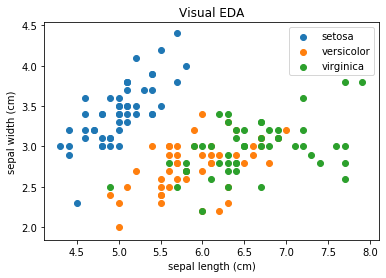

In [16]:
setosa = feature_data[target_data==0]
versicolor = feature_data[target_data==1]
virginica = feature_data[target_data==2]

plt.scatter(setosa[:,0], setosa[:,1], label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], label="versicolor")
plt.scatter(virginica[:,0], virginica[:,1], label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Visual EDA")

In the above step, we used boolean indexing to filter the feature data based on the target data class. This allowed us to create a scatter plot for each of the iris classes and distinguish them by color.

*Observations*: We can see that the "setosa" class typically consists of medium-to-high sepal width with low-to-medium sepal length, while the other two classes have lower width and higher length. The "virginica" class appears to have the largest combination of the two. 

**YOUR TURN:** 
* Which of the iris classes is seperable based on sepal characteristics? ________________
* Which of the iris classes is not? ________________
* Can we (easily) visualize each of the samples w.r.t. all features on the same plot? Why/why not? ________________

### Creating a k-Nearest Neighbors Classifier

Now that we've explored the data a little bit, we're going to use scikit-learn to create a k-nearest neighbors classifier for the data. Effectively we'll be developing a model whose job it is to build a relationship over input feature data (sepal and petal characteristics) that predicts the iris sample class (e.g. "setosa"). This is an example of a *supervised learning* task; we have all the features and all the target classes.

Nearest neightbors classifiers are quite simple. They predict the class of a new data sample based off the *nearest* data points to that sample. The 'nearest' metric is calculated via a distance function (often [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)). 

<img src="img/knn.png" alt="knn" width="200"/>

For example, in the above diagram, suppose we are looking to classify the green circle as either a red triangle, or a blue square. If k = 1 (i.e., we look at one neighbor), our model would predict *red triangle*. If k=2, it would still predict *red triangle*. If k=3, the model would predict *red triangle* as it is the *majority* class of the 3 nearest neighbors. It isn't until k=5 that the algorithm actually predicts *blue square*.

Model creation in scikit-learn follows a **data prep -> fit -> predict** process. The "fit" function is where the actual model is trained and parameter values are selected, while the "predict" function actually takes the trained model and applies it to the new samples.

First, we load the nearest neighbor library from scikit-learn:

In [17]:
from sklearn import neighbors

Now, we're going to save our feature data into an array called 'X' and our target data into an array called 'y'. We don't *need* to do this, but it is traditional to think of the problem using this notation.

In [20]:
X = feature_data
y = target_data

Next, we create our nearest neighbor classifier object:

In [31]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

And then we *fit* it to the data (i.e., train the classifier).

In [32]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Now we have a model! If you're new to this, you've officially built your first machine learning model. If you use "knn.predict(*[[feature array here]]*)", you can use your trained model to predict the class of a new iris sample. 

**YOUR TURN:**
* What is the predicted class of a new iris sample with feature vector [3,4,5,2]? What is its name? ________________
* Do you think this model is overfit or underfit to the iris dataset? Why? ________________
* How many neighbors does our model consider when classifying a new sample? ________________

As you may have noted in the previous cell, we've trained this classifier on our *entire dataset*. This typically isn't done in practice and results in overfitting to the data. Here's a bit of a tricky question:

**YOUR TURN:**
* If we use our classifier to predict the classes of the iris samples that were used to train the model itself, what will our overall accuracy be? ________________

We can validate our hypothesis fairly easily using either: i) the NumPy technique for calculating accuracy we used earlier in the lab, or ii) scikit-learn's in-house "accuracy_score()" function.

Let's use our technique first:

In [33]:
accuracy = np.sum(target_data == knn.predict(feature_data)) / target_data.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


and then using scikit-learn's customized function:

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_data, knn.predict(feature_data))
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


We see that our classifier has achieved 100% accuracy (and both calculation methods agree)!

**DISCUSSION:** 
* Why do you think the model was able to achieve such a "great" result? ______________________
* What does this really tell us?  __________________________________
* Do you expect the model to perform this well on new data? __________________________________

### Cross Validation

A popular way to mitigate this overfitting issue is to train your model on *some* of the data (the training set) and validate your model on the remaining data (the validation set). You will then select the model/configuration that performs best on the validation data. The train/validate division of the data is usually done with a 70%/30% split. Often, practitioners will use a third data set, the test set (or hold-out set), to get a sense for how their best model performs on unseen, real-world data. In this scenario, you will tune your models to perform best on the validation set and then test their "real-world" performance on the unseen test set.

Sometimes applications don't have enough data to do these splits meaningfully (e.g., the test data is only a few samples). In these cases, *cross-validation* is a useful technique (and, indeed, has become standard in machine learning practice). 

The general premise of "k-folds" cross validation is to first divide the entire dataset (grey) into a training set (green) and a test set (unseen data, blue). Then, we divide the training set into different folds and use these folds to form new sub-training and sub-test sets. We select the model configuration that performs the best on all of these. The below figure provides a nice visualization for what's going on here:

<img src="img/cross-val.png" alt="cross-val" width="500"/>


Accomplishing k-folds cross validation in scikit-learn is a manageable task. First, we divide our data into a train and test set, then we conduct the cross validation and look at the mean scores across the splits, then we conduct our final evaluation.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

We have divided our data into two sections: training data (70% of the data) and testing data (30% of the data). Now we will fit our nearest neighbors classifier to the training data with 5 folds and see how it performs.

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print(scores)

Accuracy: 0.94 (+/- 0.11)
[0.86363636 1.         1.         0.9047619  0.94736842]


Our cross-validated model has an accuracy of 94% across all the splits on the training data. If we think that is a reasonable value, we can train our final model on the training data and then see how it performs on the held-out test data. 

##### Comparing classifiers
However, to get a true sense for the utility of cross-validation, let's create a second nearest neighbors classifier that uses two neighbors instead of one. 

In [38]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(knn2, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.12)


As we see above, our second classifier (the one with two neighbors) actually performs worse when cross-validated (92% vs. 94% mean accuracy on the 5 folds)! So, we'll stick with the first one. 

Let's train it on the training data and use it to predict the final held-out test data.

In [39]:
knn.fit(X_train, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  97.77777777777777 %


And we see our model has a 97.7% accuracy on the held out test data (30% of the original dataset).

### A closer look at training


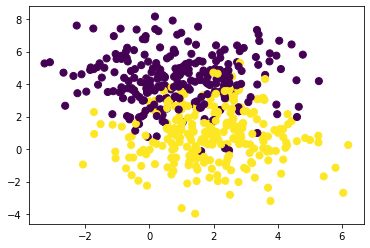

In [40]:
from sklearn import linear_model

from sklearn.datasets.samples_generator import make_blobs

X_train, y_train = make_blobs(n_samples=500, centers=2,random_state=0, cluster_std=1.60)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50);

In [41]:
clf = linear_model.SGDClassifier(verbose=1)
clf.fit(X_train, y_train)

print(clf.coef_)
print(clf.intercept_)

-- Epoch 1
Norm: 44.37, NNZs: 2, Bias: 84.738074, T: 500, Avg. loss: 12.068334
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 38.70, NNZs: 2, Bias: 66.187455, T: 1000, Avg. loss: 9.078200
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 36.11, NNZs: 2, Bias: 61.553485, T: 1500, Avg. loss: 6.840432
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 25.61, NNZs: 2, Bias: 46.773985, T: 2000, Avg. loss: 5.466549
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 17.41, NNZs: 2, Bias: 40.744203, T: 2500, Avg. loss: 4.605733
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 22.76, NNZs: 2, Bias: 24.610477, T: 3000, Avg. loss: 4.075765
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 15.29, NNZs: 2, Bias: 33.985813, T: 3500, Avg. loss: 3.604688
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 18.24, NNZs: 2, Bias: 31.885731, T: 4000, Avg. loss: 3.547988
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 14.44, NNZs: 2, Bias: 27.953261, T: 4500, Avg. loss: 3.178336
Total tra

(30, 30)


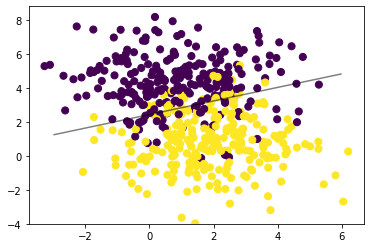

In [42]:
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
# import seaborn as sns; sns.set()

xfit = np.linspace(-1, 3.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(-3, 6, 30)
yy = np.linspace(-4, 8, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

print(Z.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])


##### Congratulatons! 

You're finished this lab. On to the next!

In [43]:
from numpy import genfromtxt
training_loss = genfromtxt('training_log.csv', delimiter=',')
print(training_loss) 

[11.785071  8.476529  6.418012  5.437324  4.941084  4.000982  3.561146
  3.265836  3.214678  2.844386  2.863052  2.288544  2.188134  2.230402
  2.020165  1.915246  1.759196  1.688146  1.62963   1.522648  1.475505
  1.454025  1.434841  1.233116  1.194389  1.137202  1.269833  1.122149
  1.149088  1.305465  1.090841  1.072001  0.899046  1.041738  1.073857
  1.072091  1.01606   1.004361]


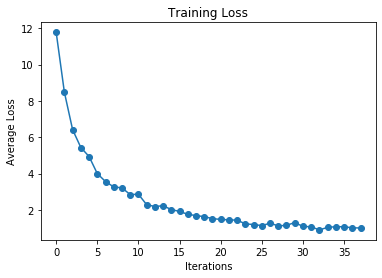

In [44]:
plt.plot(list(range(len(training_loss))), training_loss, '-o')

plt.xlabel("Iterations")
plt.ylabel("Average Loss")
plt.title("Training Loss")
plt.show()
